In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Linear Regression

Linear Regression is a fundamental algorithm in machine learning

It is used as a building block for other ML models

LR is easy to understand, calculate, and interpret

LR is fast!

Often good enough. Don't over-engineer your solution. If your data is linear then use a linear model.

What is linear data?

In [2]:
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

In [ ]:
plt.scatter(X, y)

The response or output is directly proportional to the input

We can see from the data that we have a linear trend in our model. (The response or output is directly proportional to the input)

We can use Linear Regression to fit a line through the data.

![lr](../Images/linear_regression.jpg)

Using a trained model allows us to make predictions of the output value (Home Selling Price) given a new input (Number of Bathrooms).

![pre-prices1](../Images/predict_prices_1.png)

New House on the Market
![pre-prices2](../Images/predict_prices_2.png)

We can use our linear model to predict the price of that house
![pre-prices3](../Images/predict_prices_3.png)

What about non-linear data?

In [ ]:
from sklearn.datasets import make_s_curve

data, color = make_s_curve(100, random_state=0)
plt.scatter(data[:,0], color)

![happy](../Images/happy.gif)

## Linear Regression 

A regression line is simply calculating a line that best fits the data. This is typically done through the least squares method where the line is chosen to have the smallest overall distance to the points.

$y = \theta_0 + \theta_1 x$

* $y$ is the output response
* $x$ is the input feature
* $\theta_0$ is the y-axis intercept
* $\theta_1$ is weight coefficient (slope)


## Sklearn

The Sklearn library provides us with a Linear Regression model that will fit a line to our data. Sklearn follows a consistent API where you define a model object, fit the model to the data, and then make predictions with the model.
![sklearn](../Images/sklearn_api.png)

First, we create the model using the Sklearn LinearRegression model.

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Next, we fit the model to our data using the fit method. 

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
voice = pd.read_csv(os.path.join('Resources', 'FINALhashedcsv.csv'))
voice.head()

# Assign X (data) and y (target)
X = voice["hash"]
y = voice["toxic"]
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

(159571,) (159571,)


In [9]:
X=X.reshape(-1, 1)
y=y.reshape(-1, 1)
model.fit(X, y)
print(model)

/anaconda2/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/anaconda2/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


We can view the coefficients and intercept of the line from the `coef_` and `intercept_` attributes. Note that the `_` suffix indicates that the attribute is available after model is fit to the data (trained).

In [10]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[9.51499888e-42]]
y-axis intercept:  [0.09422646]


Our linear model now looks like this: 

$y = 101.896225057 + 12.44002424 x$


We can use our model to make predictions.

In [11]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [0]
Predicted output: [0.0944711]
Prediction Error: [0.0944711]


In [76]:
from sklearn.metrics import mean_squared_error, r2_score
# Score the prediction with mse and r2
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.08665744569526851
R-squared (R2 ): 1.006711713924524e-05


In [77]:
model.score(X, y)

1.0067117139245239e-05

In [78]:
# temp=pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]
data=np.column_stack([predictions,y,predictions-y]);
temp=pd.DataFrame(data,columns=["Predicted", "Actual", "Error"])

#Export DataFrame as CSV
temp.to_csv('output.csv')

In [79]:
temp

,Predicted,Actual,Error
0,0.094471,0.0,0.094471
1,0.097316,0.0,0.097316
2,0.094720,0.0,0.094720
3,0.095510,0.0,0.095510
4,0.095931,0.0,0.095931
5,0.096184,0.0,0.096184
6,0.097267,1.0,-0.902733
7,0.095353,0.0,0.095353
8,0.095295,0.0,0.095295
9,0.095751,0.0,0.095751


<Container object of 159571 artists>

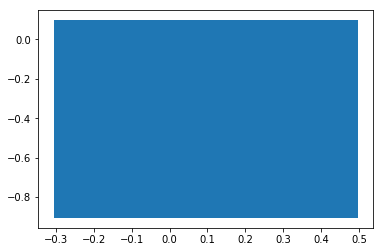

In [73]:
# temp.index.name = 'Predicted'
# temp.reset_index()
# # type(temp)
# temp

plt.bar(temp["Predicted"],temp["Error"])

In [53]:
# temp.reset_index()
# temp.transpose()
# temp
df1 = pd.DataFrame(data=temp.index, columns=['Predicted'])
df2 = pd.DataFrame(data=temp['Actual'], columns=['Actual'])
df3 = pd.DataFrame(data=temp['Error'], columns=['Error'])
df = pd.merge(df1, df2, df3, left_index=True, right_index=True)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

We can calculate the output response for the minimum and maximum input values. Note: This is useful later when we want to plot the fit line.

In [13]:
x_min = X.min()
x_max = X.max()

In [14]:
y_min_actual = y.min()
y_max_actual = y.max()

In [15]:
y_min = 101.896225057 + 12.44002424 * x_min
y_max = 101.896225057 + 12.44002424 * x_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0
Calculated Min Value: 7.173435830278705e+33
Actual Max Value: 1
Calculated Max Value: 4.233104355775127e+39


We can also use the predict function to calculate predicted values

In [16]:
y_min_predicted = model.predict(x_min)
y_max_predicted = model.predict(x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

ValueError: Expected 2D array, got scalar array instead:
array=5.766416280133153e+32.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

We can show the model fit by plotting the predicted values against the original data

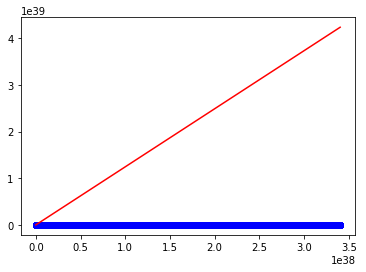

In [17]:
plt.scatter(X, y, c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [81]:
testVar = input("Input sentence without a variable.")
testVar

Input sentence without a variable.blah blah


'blah blah'

## Your Turn!